# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
x_train.shape
# The dataset contains, 50k images. Each image is saved as a 3x3 matrx, for RGB

(50000, 32, 32, 3)

In [4]:
import numpy as np
np.unique(y_train) # y_train has integer values, each of which correspond to the classes in the list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

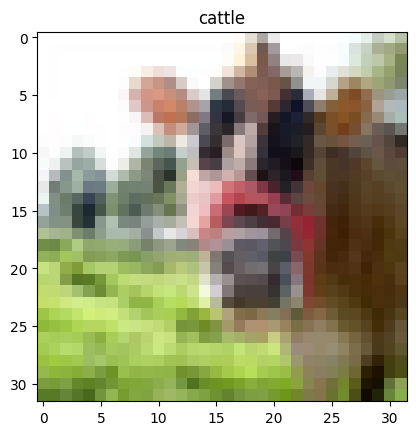

In [5]:
import matplotlib.pyplot as plt

# Display a single image
plt.imshow(x_train[0])  # Display the first image in the training set
plt.title(class_names[y_train[0][0]])  # Set the title to the class name
plt.show()

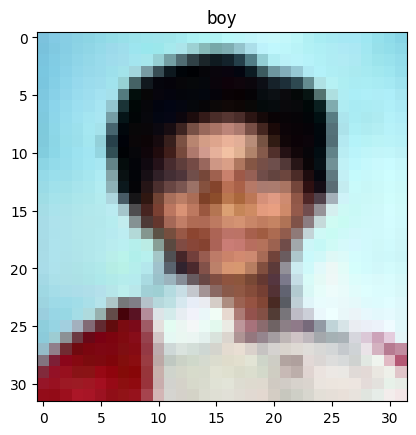

In [6]:
import matplotlib.pyplot as plt

# Display a single image
plt.imshow(x_train[3])  # Display the 4th image in the training set
plt.title(class_names[y_train[3][0]])  # Set the title to the class name
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
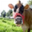

In [7]:
x_train[0]

In [8]:
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=100)  # 100 classes in CIFAR-100
y_test = to_categorical(y_test, num_classes=100)

# 3. Split the training set into training and validation sets
# validation set will be used for hyperparameter tuning
# the original test set will be completely independent
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D((2, 2)))
# I don't need maxpooling layers, because I have enough computing resources


# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))  # 100 classes in CIFAR-100
# The last 'flat' layer has to match the number of classes

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,557,508 (17.39 MB)

 Trainable params: 4,557,508 (17.39 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______ A according to google search, categorical cross entropy is a good loss function for a multi-class problem. In this dataset, each image can be any of the 100 classes. For each image, this loss function will calculate the prob of all 100 classes and then minimise the loss function:

$L = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)$

- <b>Optimizer:</b> ______ I chose adam for this initial model, which performs well across different architectures, can optimize this using cross validation later.

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [15]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.0597 - loss: 4.1938 - val_accuracy: 0.1930 - val_loss: 3.3580
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2173 - loss: 3.2222 - val_accuracy: 0.2731 - val_loss: 2.9586
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3172 - loss: 2.7077 - val_accuracy: 0.3129 - val_loss: 2.7884
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4061 - loss: 2.2809 - val_accuracy: 0.3336 - val_loss: 2.7396
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4949 - loss: 1.8808 - val_accuracy: 0.3440 - val_loss: 2.8075
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6086 - loss: 1.4349 - val_accuracy: 0.3403 - val_loss: 2.9930
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7153 - loss: 0.9980 - val_accuracy: 0.3308 - val_loss: 3.3968
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8080 - loss: 0

In [18]:
# Looking at the output above, the val_accuracy starts going down after 6 onwards,
# which means that my model is now overfitting.
# Choose 5 as the best number of epochs

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9240 - loss: 0.2366 - val_accuracy: 0.3115 - val_loss: 5.8426
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9359 - loss: 0.1994 - val_accuracy: 0.3098 - val_loss: 6.3262
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9426 - loss: 0.1813 - val_accuracy: 0.3047 - val_loss: 6.6859
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9478 - loss: 0.1683 - val_accuracy: 0.3117 - val_loss: 7.1127
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9513 - loss: 0.1555 - val_accuracy: 0.3011 - val_loss: 7.4559


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 30.1 % on the test set
- <b>Other metric:</b> Precision (Accuracy is the same as recall, precision and recall usually go hand in hand)
- <b>Reason for selection:</b> Precision tells me how 'precise' are my prediction. For every image classied as an apple, how many were actually an apple.
- <b>Value of metric:</b> 31.8 % (Check next cell for code)
- <b>Interpretation of metric value:</b> On an average, out of all the images classified as X, how many are actually X.

In [25]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# 1. Get predictions and true labels (as you did before)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 2. Get unique class labels
unique_classes = np.unique(y_true)

# 3. Calculate precision and recall for each class
precision_per_class = []
recall_per_class = []
for class_label in unique_classes:
    # Create binary labels for the current class
    y_true_binary = (y_true == class_label).astype(int)
    y_pred_binary = (y_pred_classes == class_label).astype(int)

    # Calculate precision and recall for the current class
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)

    precision_per_class.append(precision)
    recall_per_class.append(recall)

# 4. Calculate weighted average precision and recall
weights = np.bincount(y_true) / len(y_true)  # Weights based on class frequencies
weighted_avg_precision = np.average(precision_per_class, weights=weights)
weighted_avg_recall = np.average(recall_per_class, weights=weights)

print("Weighted Average Precision:", weighted_avg_precision)
print("Weighted Average Recall:", weighted_avg_recall)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Weighted Average Precision: 0.31808141255028116
Weighted Average Recall: 0.30110000000000003


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9670 - loss: 0.1109 - val_accuracy: 0.2944 - val_loss: 9.6595
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9612 - loss: 0.1320 - val_accuracy: 0.2946 - val_loss: 10.4580
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9669 - loss: 0.1085 - val_accuracy: 0.3002 - val_loss: 10.3267
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9675 - loss: 0.1077 - val_accuracy: 0.2932 - val_loss: 10.2911
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9636 - loss: 0.1270 - val_accuracy: 0.2977 - val_loss: 10.4602
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9722 - loss: 0.0945 - val_accuracy: 0.2947 - val_loss: 10.8808
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9692 - loss: 0.1175 - val_accuracy: 0.2940 - val_loss: 11.0249
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9697 - loss: 

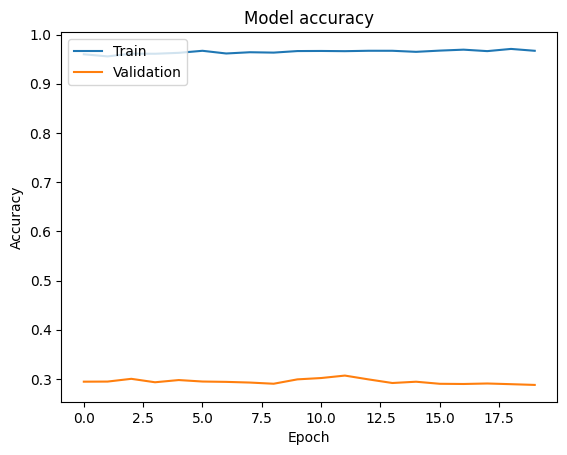

In [32]:
# I finally chose only 5 epochs, but here I will plot for 20 epochs to visualise overfitting
history_ = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# After looking at plot below, looks like 12 is better than 5
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [34]:
# After looking at the learning curve in Task 3, I can see that choosing an epoch of 5 is
# not the best solution for overfitting because the test set accuracy improved at epoch 12.
# But even at epoch 12, the train accuracy is 97% and the validation accuracy is only 30%.
# This is a huge difference, the model is clearly struggling with overfitting - working
# fine for train data, but not on unseen data. I will dropout regularization to help with this

from keras.layers import Dropout

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.125))
#model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))  # Dropout rate of 0.25 (25% of neurons dropped)
#model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))  # Dropout rate of 0.5 (50% of neurons dropped)
#model.add(MaxPooling2D((2, 2)))
# I don't need maxpooling layers, because I have enough computing resources


# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))  # 100 classes in CIFAR-100
# The last 'flat' layer has to match the number of classes

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      67,109,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,472,068 (257.39 MB)

 Trainable params: 67,472,068 (257.39 MB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.0280 - loss: 4.5153 - val_accuracy: 0.1366 - val_loss: 3.7048
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 32ms/step - accuracy: 0.1641 - loss: 3.5251 - val_accuracy: 0.2186 - val_loss: 3.2732
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.2492 - loss: 3.0650 - val_accuracy: 0.2485 - val_loss: 3.0976
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.3272 - loss: 2.6564 - val_accuracy: 0.2687 - val_loss: 3.0198
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4180 - loss: 2.2469 - val_accuracy: 0.2859 - val_loss: 3.1151
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.5217 - loss: 1.7843 - val_accuracy: 0.2751 - val_loss: 3.3408
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6385 - loss: 1.3086 - val_accuracy: 0.2722 - val_loss: 3.6513
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.7455 -

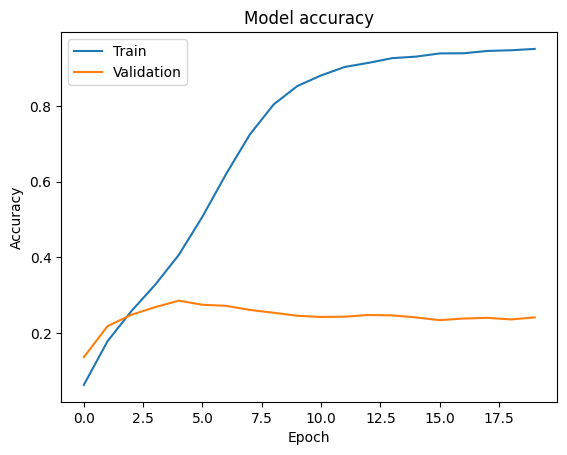

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history__ = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# After looking at plot below, looks like 12 is better than 5
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history__.history['accuracy'])
plt.plot(history__.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
- I can see an improvement in overfitting. But the 'gap' between the train and test is still wide after 5. This is probably because there are just too many image categories in this dataset. I need to explore more techniques to handle overfitting.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.